In [1]:
#Importing all the necessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing SQL connection

from sqlalchemy import create_engine
import mysql.connector

In [3]:
#Creating engine to import the file from Mysql
engine=create_engine("mysql+mysqlconnector://root:"+'Saurabh@90'+"@localhost/studentmarks")

In [4]:
#Importing our file
df=pd.read_sql_table("stud_marks",engine) 
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [5]:
#Checking columns in dataframe
df.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

In [6]:
#Checking shape of our dataframe
df.shape

(10, 11)

Here 10 rows and 11 columns are present.

In [7]:
#Checking data types
df.dtypes

Name                 object
Gender               object
DOB          datetime64[ns]
Maths                 int64
Physics               int64
Chemistry             int64
English               int64
Biology               int64
Economics             int64
History               int64
Civics                int64
dtype: object

In [8]:
#Checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
Name         10 non-null object
Gender       10 non-null object
DOB          10 non-null datetime64[ns]
Maths        10 non-null int64
Physics      10 non-null int64
Chemistry    10 non-null int64
English      10 non-null int64
Biology      10 non-null int64
Economics    10 non-null int64
History      10 non-null int64
Civics       10 non-null int64
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 960.0+ bytes


Observation:
    
    1-10 rows and 11 columns are present in our dataset.
    
    2-No missing values are present in our dataset.
    
    3-Name and Gender are object data type ,DOB is datetime data type and others columns are in integer datatype. 

# Summary Statistics

In [9]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


Observation:
    
    1-Standard deviation is maximum in Biology and Civics.
    
    2-Minimum number is 2 in Civics.
    
    3-In Chemistry and Economics minimum number is more than 50 means students preform well in these two subjects.
    
    4-In Maths min number is 25 and in Biology min number is 21.

# Exploring data variables

In [10]:
df.Gender.unique()

array(['M', 'F'], dtype=object)

In [11]:
df.Gender.value_counts()

M    5
F    5
Name: Gender, dtype: int64

In our dataset there are five male students and five female students

In [12]:
#Checking for missing values
df.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

There is no missing values in our data set.

We can also see this with the help of visualization for better clearity.

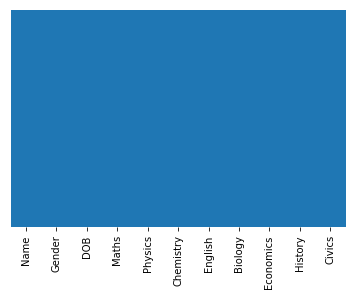

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20')

From this visualization we can clearly see that there is no missing values present in our dataset

# TO Check the correlation

In [14]:
df_cor=df.corr()
df_cor

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


Here we can see the correlation between our columns.

For better understanding we can see it via heatmap(Visualization)

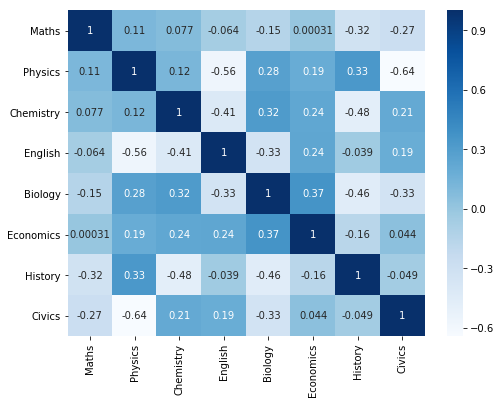

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cor,cmap='Blues',annot=True)

From this we can clearly observe some data.

Observation 1--Math is highly correlated with Physics.

Observation 2--Physics is highly negatively correlated with Civics and English.

# Data Visualization

## Univariate Analysis

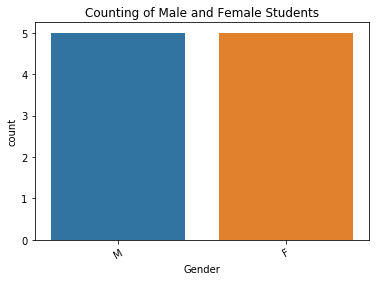

In [16]:
sns.countplot(df['Gender'])
plt.title('Counting of Male and Female Students')
plt.xticks(rotation=30)
plt.show()

The Plotting shows that thre are five male and female students

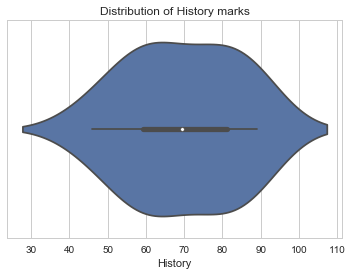

In [17]:
#Plotting violinplot

sns.set(style='whitegrid')
sns.violinplot(x='History',data=df)
plt.title("Distribution of History marks")
plt.show()

In History mostly marks is distributed between 60 to 88

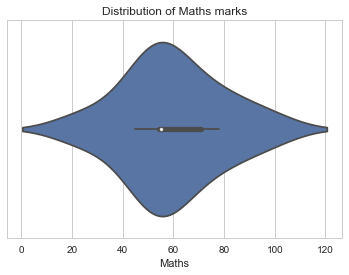

In [18]:
sns.set(style='whitegrid')
sns.violinplot(x='Maths',data=df)
plt.title("Distribution of Maths marks")
plt.show()

From here we can see that maximum marks distributed between 45 to 65 in Maths.

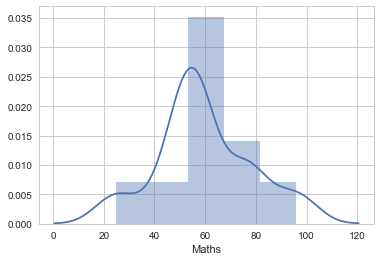

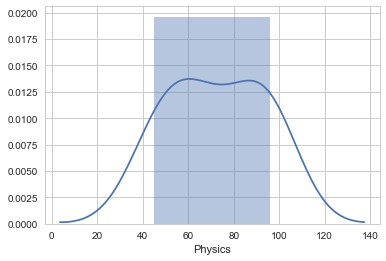

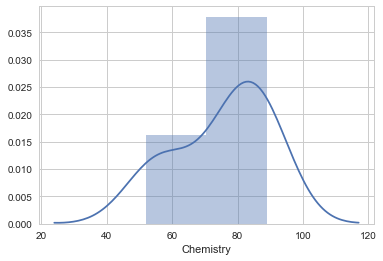

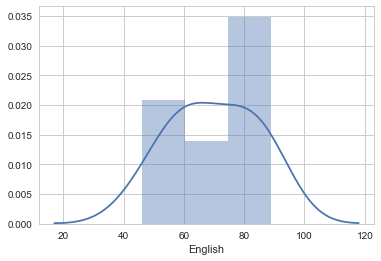

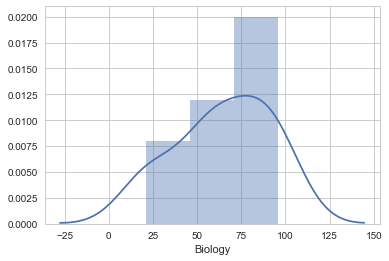

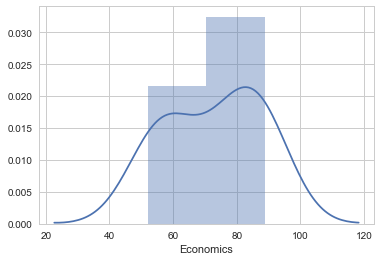

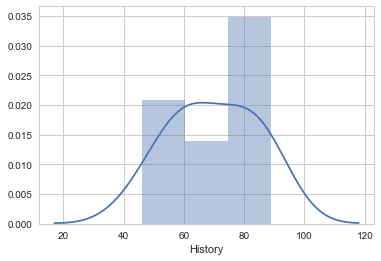

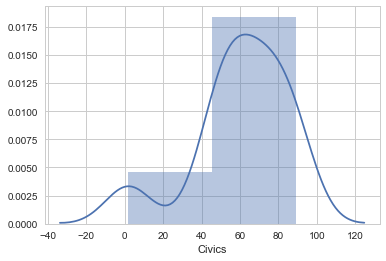

In [19]:
#Distribution plot for all the numeric columns

for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

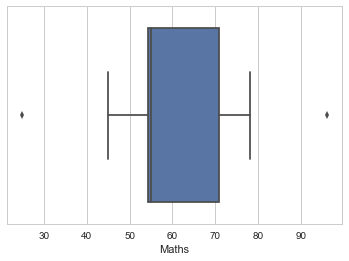

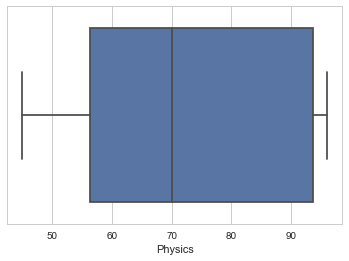

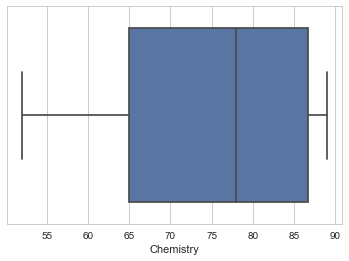

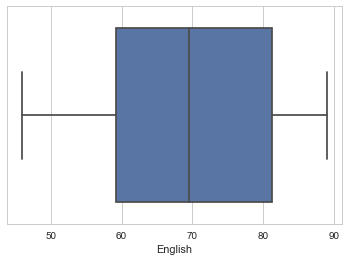

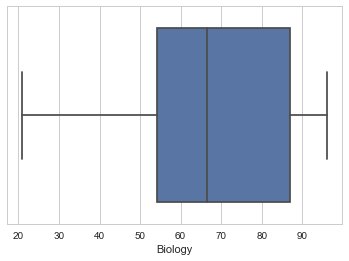

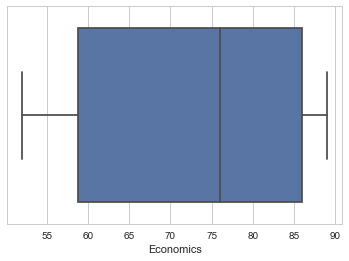

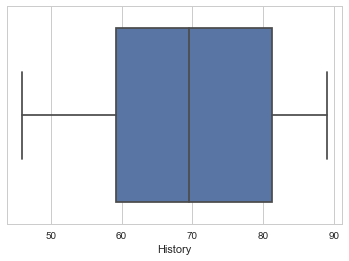

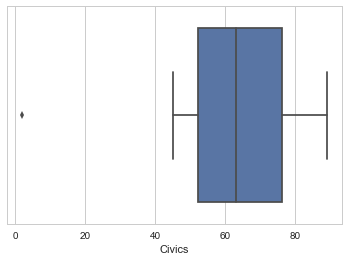

In [20]:
#We can also use box plot to see the same information
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

## Bivariate Analysis

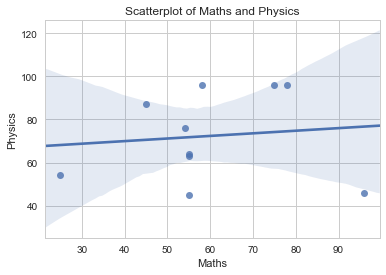

In [21]:
sns.regplot(x='Maths',y='Physics',data=df)
plt.title('Scatterplot of Maths and Physics')
plt.xlabel('Maths')
plt.ylabel('Physics')
plt.show()

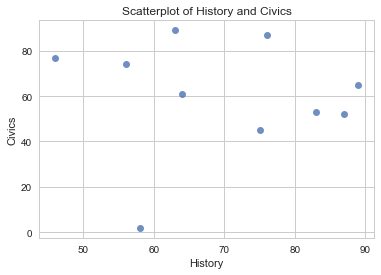

In [22]:
sns.regplot(x='History',y='Civics',data=df,fit_reg=False)
plt.title('Scatterplot of History and Civics')
plt.xlabel('History')
plt.ylabel('Civics')
plt.show()

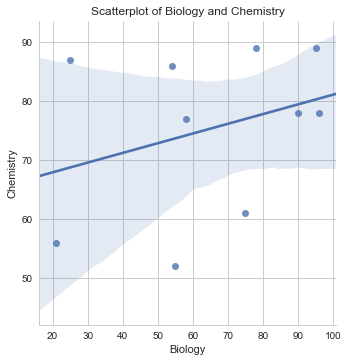

In [23]:
sns.lmplot(x='Biology',y='Chemistry',data=df)
plt.title('Scatterplot of Biology and Chemistry')
plt.xlabel('Biology')
plt.ylabel('Chemistry')
plt.show()

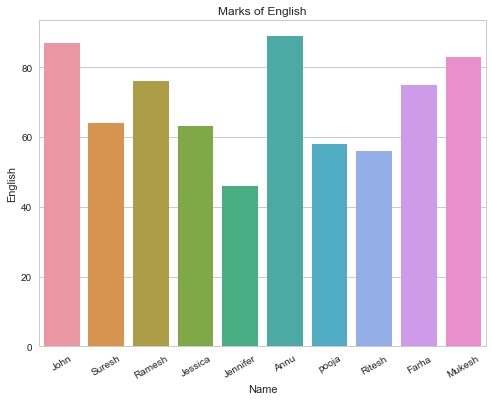

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x='Name',y='English',data=df)
plt.xticks(rotation=30)
plt.title('Marks of English')
plt.show()

Observation 1-Annu got highest marks in English.

Observation 2-Jennifer got lowest marks in English

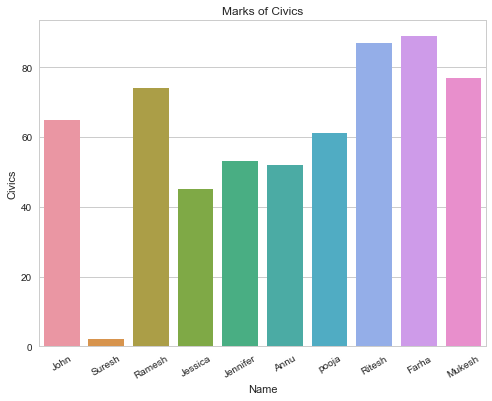

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x='Name',y='Civics',data=df)
plt.xticks(rotation=30)
plt.title('Marks of Civics')
plt.show()

Observation 1-Farha got highest marks in Civics.

Observation 2-Suresh got lowest marks in Civics.


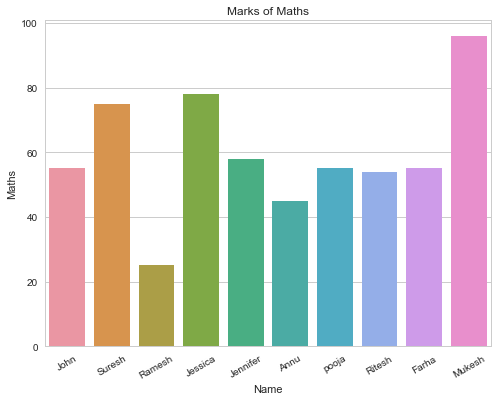

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x='Name',y='Maths',data=df)
plt.xticks(rotation=30)
plt.title('Marks of Maths')
plt.show()

Observation 1-Mukesh got highest marks in Maths.

Observation 2-Ramesh got lowest marks in Maths.


## Multivariate Analysis

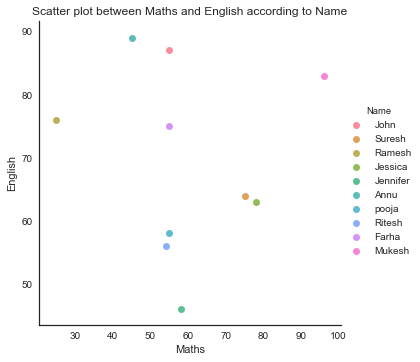

In [27]:
sns.set(style='white')
sns.lmplot(x='Maths',y='English',data=df,hue='Name',fit_reg=False)
plt.title("Scatter plot between Maths and English according to Name")
plt.show()

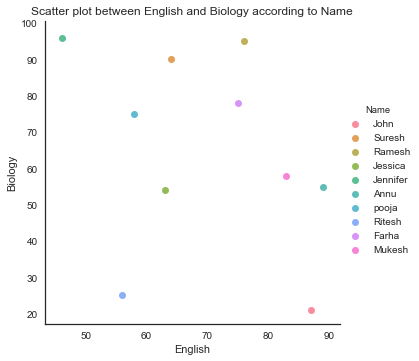

In [28]:
sns.lmplot(x='English',y='Biology',data=df,hue='Name',fit_reg=False)
plt.title("Scatter plot between English and Biology according to Name")
plt.show()

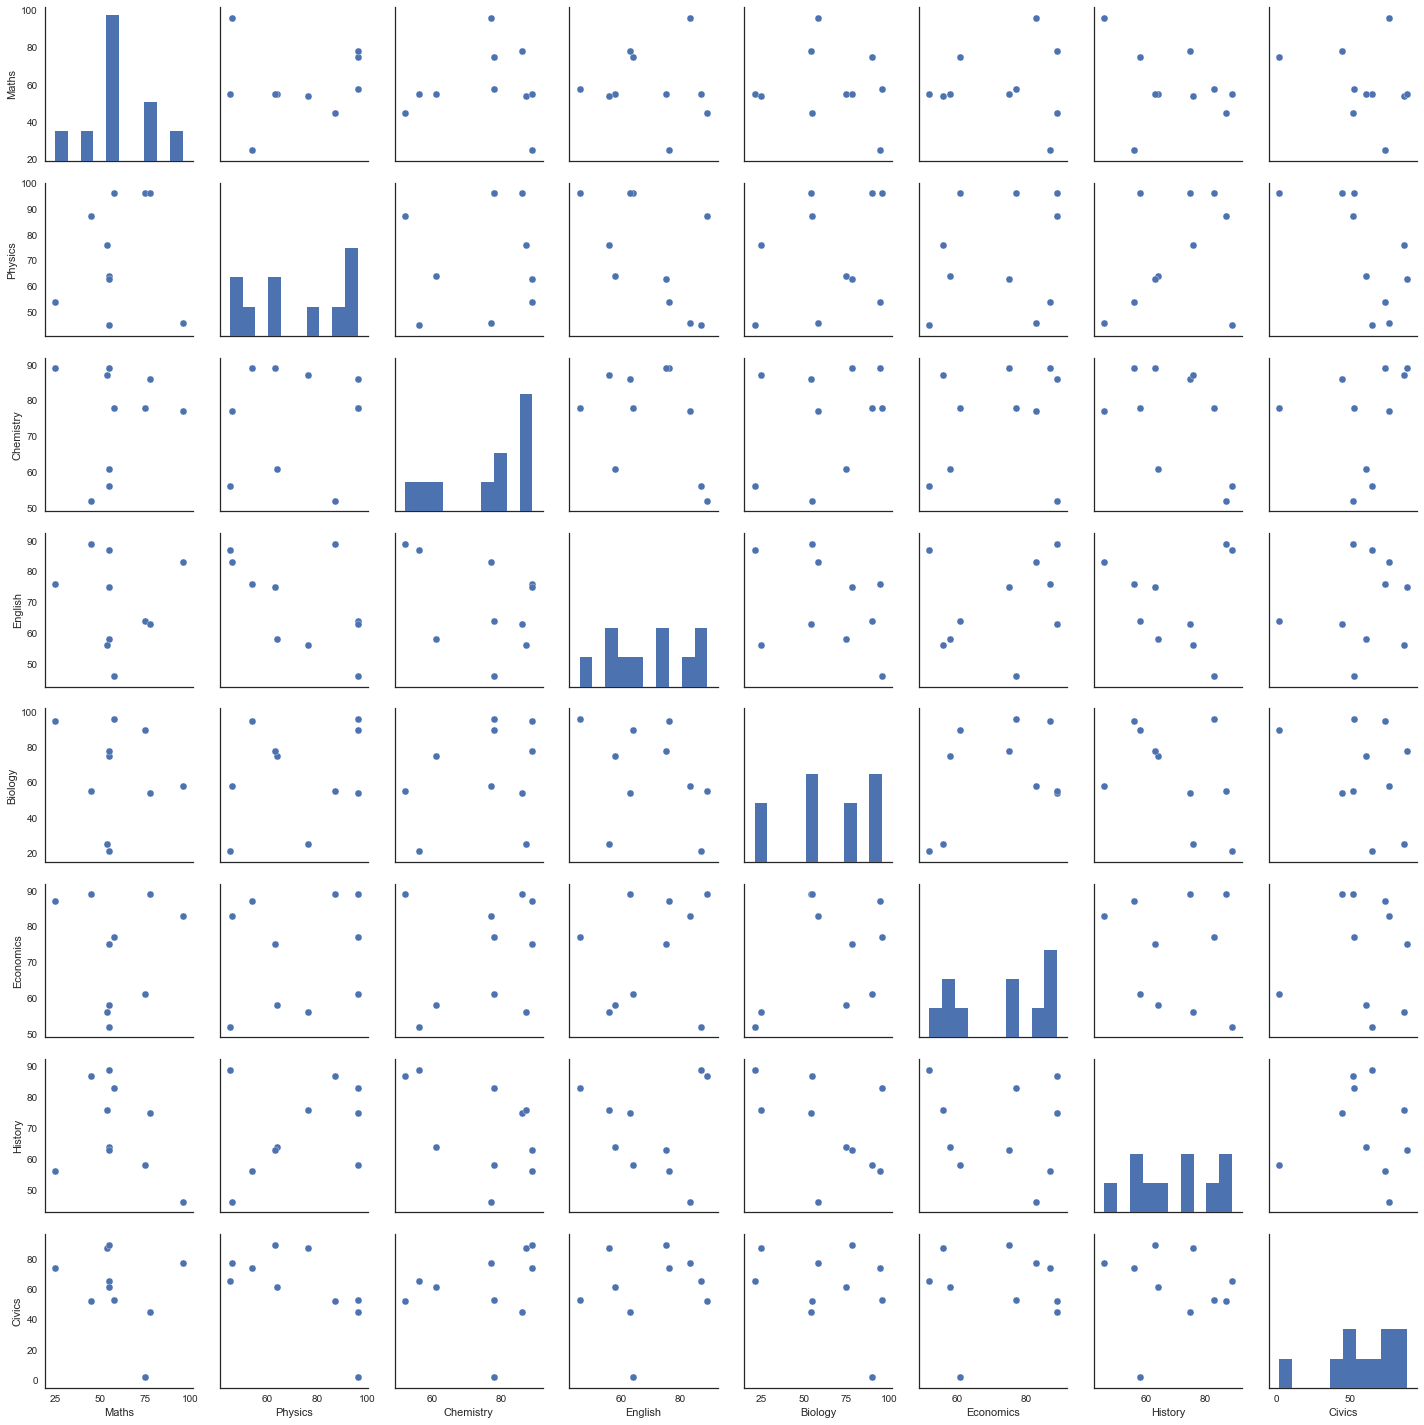

In [29]:
#Pairplot
sns.pairplot(df)

# Plotting Outliers

In [30]:
df.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

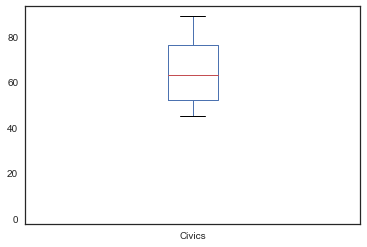

In [31]:
#Checking the outliers in Civics
df['Civics'].plot.box()

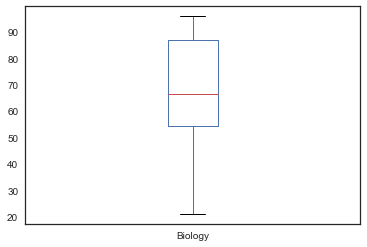

In [32]:
#Checking the outliers in Biology
df['Biology'].plot.box()

In [33]:
df.shape

(10, 11)

In [34]:
collist=df.columns.values
ncol=11
nrow=10

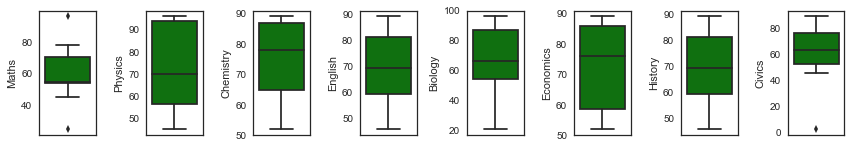

In [35]:
plt.figure(figsize=(16,20))
for i in range(3,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

## To check the distribution of Skewness

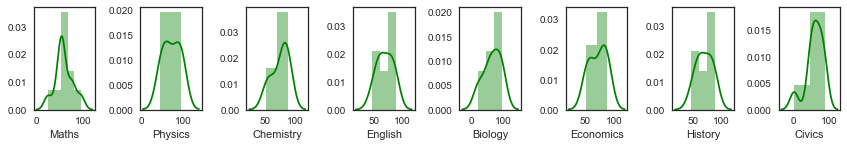

In [36]:
plt.figure(figsize=(16,20))
for i in range(3,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [37]:
df.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [38]:
#Removing Skewness
from scipy.stats import boxcox
df['Chemistry']=boxcox(df['Chemistry'],0)
df['Civics']=boxcox(df['Civics'],0)

In [39]:
df.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.896361
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -2.927420
dtype: float64

# Removing Outliers

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df.describe()))
z

array([[1.43606909e+00, 1.62944160e+00, 2.22109901e+00, 1.63394677e+00,
        1.47736198e+00, 1.66190421e+00, 1.63394677e+00, 2.24970594e+00],
       [4.01740669e-01, 4.85649548e-01, 7.56125049e-02, 5.38865836e-01,
        3.88699670e-01, 5.37138447e-01, 5.38865836e-01, 9.12320076e-02],
       [1.08553277e+00, 1.26748064e+00, 1.73016683e+00, 1.47186392e+00,
        8.97479126e-01, 1.49954968e+00, 1.47186392e+00, 1.11785881e+00],
       [8.80279851e-01, 4.41188146e-01, 2.17944142e-01, 3.23708011e-01,
        1.10210278e+00, 1.88861283e-01, 3.23708011e-01, 1.28189065e+00],
       [2.03509173e-01, 5.92495361e-02, 1.30095117e-01, 1.58532642e-01,
        3.22034307e-02, 4.78777593e-02, 1.58532642e-01, 4.37599418e-02],
       [2.31298635e-01, 4.07564321e-01, 5.44482346e-02, 5.31586731e-01,
        4.50105720e-01, 6.52877534e-01, 5.31586731e-01, 2.70570702e-02],
       [8.14877340e-01, 1.21387916e+00, 1.15811662e-02, 9.59234103e-01,
        1.14945241e+00, 1.00360204e+00, 9.59234103e-01, 9.

In [41]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


There is no Outliers present in the dataset

In [42]:
#Making copy of our dataset
df1=df.copy()

In [43]:
#Encoding the gender column
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
gender=label.fit_transform(df1['Gender'])

In [44]:
df2=pd.DataFrame(gender,columns=['Sex'])
df2

,Sex
0,1
1,1
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,1


1 for male

0 for female.

In [45]:
#Adding both of the dataframe

marks=pd.concat([df1,df2],axis=1)
marks

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Sex
0,John,M,1988-04-05,55,45,4.025352,87,21,52,89,4.174387,1
1,Suresh,M,1987-05-04,75,96,4.356709,64,90,61,58,0.693147,1
2,Ramesh,M,1989-05-25,25,54,4.488636,76,95,87,56,4.304065,1
3,Jessica,F,1990-08-12,78,96,4.454347,63,54,89,75,3.806662,0
4,Jennifer,F,1989-09-02,58,96,4.356709,46,96,77,83,3.970292,0
5,Annu,F,1988-04-05,45,87,3.951244,89,55,89,87,3.951244,0
6,pooja,F,1987-05-04,55,64,4.110874,58,75,58,64,4.110874,0
7,Ritesh,M,1989-05-25,54,76,4.465908,56,25,56,76,4.465908,1
8,Farha,F,1990-08-12,55,63,4.488636,75,78,75,63,4.488636,0
9,Mukesh,M,1989-09-02,96,46,4.343805,83,58,83,46,4.343805,1


In [46]:
#Dropping the Gender Column
marks.drop(['Gender'],axis=1,inplace=True)

In [47]:
marks

,Name,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Sex
0,John,1988-04-05,55,45,4.025352,87,21,52,89,4.174387,1
1,Suresh,1987-05-04,75,96,4.356709,64,90,61,58,0.693147,1
2,Ramesh,1989-05-25,25,54,4.488636,76,95,87,56,4.304065,1
3,Jessica,1990-08-12,78,96,4.454347,63,54,89,75,3.806662,0
4,Jennifer,1989-09-02,58,96,4.356709,46,96,77,83,3.970292,0
5,Annu,1988-04-05,45,87,3.951244,89,55,89,87,3.951244,0
6,pooja,1987-05-04,55,64,4.110874,58,75,58,64,4.110874,0
7,Ritesh,1989-05-25,54,76,4.465908,56,25,56,76,4.465908,1
8,Farha,1990-08-12,55,63,4.488636,75,78,75,63,4.488636,0
9,Mukesh,1989-09-02,96,46,4.343805,83,58,83,46,4.343805,1


In [48]:
#save the file 
marks.to_csv('stud_marks.csv')

Now From here our dataset is ready for model training.

Its upto you how you are doing model training.

You can create a column Total Marks as a target variable to check who gets more marks.